Studen: Antonio Neto

Dataset shape: (20640, 8)
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
PCA shape: (20640, 2)


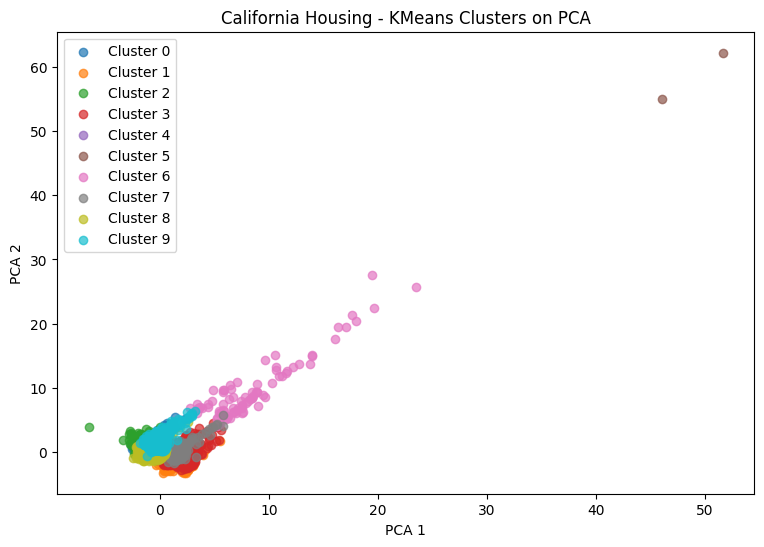

Top 3 anomalies (by reconstruction error): [16669  3364 19006]
Their reconstruction errors: [ 291.95734227  414.01772561 1787.92488267]

Anomalous samples' original data:
        MedInc  HouseAge  AveRooms  AveBedrms  Population     AveOccup  \
16669   4.2639      46.0  9.076923   1.307692      6532.0   502.461538   
3364    5.5179      36.0  5.142857   1.142857      4198.0   599.714286   
19006  10.2264      45.0  3.166667   0.833333      7460.0  1243.333333   

       Latitude  Longitude  
16669     35.32    -120.70  
3364      40.41    -120.51  
19006     38.32    -121.98  


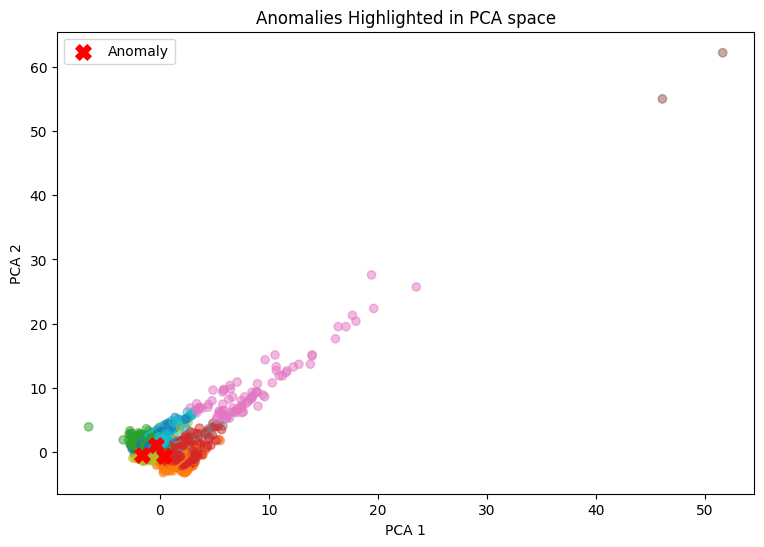

In [1]:
# Data Science Track - California Housing Exercise

# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 2: Load dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
print("Dataset shape:", X.shape)
print(X.head())

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: K-means clustering (10 groups)
kmeans = KMeans(n_clusters=10, random_state=1)
labels = kmeans.fit_predict(X_scaled)

# Step 5: PCA for 2D reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("PCA shape:", X_pca.shape)

# Step 6: Scatter plot (colored by cluster)
plt.figure(figsize=(9, 6))
for i in range(10):
    plt.scatter(
        X_pca[labels == i, 0],
        X_pca[labels == i, 1],
        label=f'Cluster {i}',
        alpha=0.7
    )
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("California Housing - KMeans Clusters on PCA")
plt.legend()
plt.show()

# Step 7: Reconstruct samples to original dimension
X_pca_inverse = pca.inverse_transform(X_pca)

# Step 8: Calculate reconstruction errors for each sample
errors = np.mean((X_scaled - X_pca_inverse) ** 2, axis=1)

# Step 9: Find the 3 most anomalous samples (highest error)
anomaly_ids = np.argsort(errors)[-3:]
print("Top 3 anomalies (by reconstruction error):", anomaly_ids)
print("Their reconstruction errors:", errors[anomaly_ids])

# Step 10: Display the anomalous samples' original data
print("\nAnomalous samples' original data:")
print(X.iloc[anomaly_ids])

# Optional: highlight anomalies on the scatter plot
plt.figure(figsize=(9, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.5)
plt.scatter(X_pca[anomaly_ids, 0], X_pca[anomaly_ids, 1], c='red', s=120, marker='X', label='Anomaly')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Anomalies Highlighted in PCA space")
plt.legend()
plt.show()


By analyzing the results of the exercise, we can see that the algorithm managed to identify some neighborhoods that stand out from the general pattern in California. The three biggest “outliers” detected are regions with extremely high populations and average occupancy rates far above the usual, suggesting areas that may be overcrowded or have characteristics very different from most neighborhoods in the dataset. This is clear from the high “Population” and “AveOccup” values found in these samples. These points highlighted by the model could represent atypical neighborhoods, exceptional situations, or even possible data errors. This type of analysis is fundamental because it helps reveal unusual patterns or unexpected situations within a large dataset, allowing for deeper investigation and more informed decision-making—whether it’s for data cleaning, model adjustments, or simply to understand specific realities that might require special attention.







